In [1]:
#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [4]:
#shape determines the dimension of the array
df.shape

(9134, 24)

In [5]:
#head() gives first 5 rows and all columns of the data
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

### 2. Overall Engagement Rate of Customer (Response Rate)

In [7]:
#Getting the total number of customers who have responded
a = df.groupby('Response').count()['Customer']
a

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

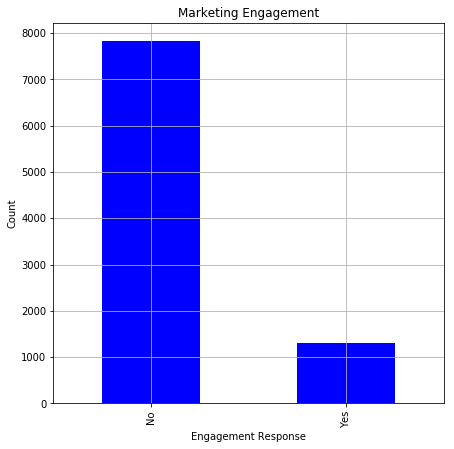

In [8]:
#visualize this in a Bar Plot
bar1 = a.plot(
    kind = 'bar',
    color = 'blue',
    figsize = (7,7),
    grid = True
)

bar1.set_title('Marketing Engagement')
bar1.set_xlabel('Engagement Response')
bar1.set_ylabel('Count')

plt.show()

In [9]:
#calculating the percentage of Customer Engagement

a_eng = round(a/df.shape[0] * 100, 2) 
a_eng

Response
No     85.68
Yes    14.32
Name: Customer, dtype: float64

**From the above output, we can see that 14% of customers responded to the Marketing Calls.**

### Engagement Rates by Offer Type

In [10]:
#Get the engagement rates per renewal offer type
#df.loc = Access a group of rows and columns by label(s) or a boolean array

offer_type_df = df.loc[
    df['Response'] =='Yes'].groupby('Renew Offer Type').count()['Customer']

percent_offer_type = offer_type_df/df.groupby('Renew Offer Type').count()['Customer']

percent_offer_type_df = round(percent_offer_type*100, 2)
percent_offer_type_df

Renew Offer Type
Offer1    15.83
Offer2    23.38
Offer3     2.09
Offer4      NaN
Name: Customer, dtype: float64

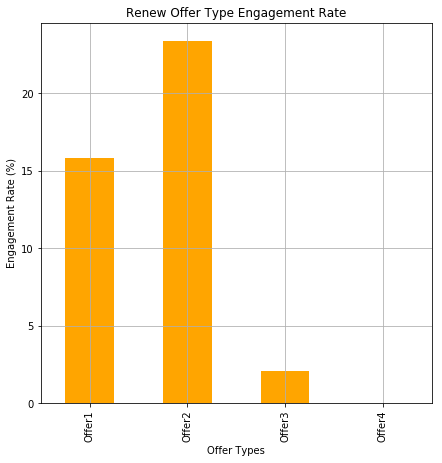

In [11]:
#Visualizing the above analytics in a Bar Plot

bar2 = percent_offer_type_df.plot(
    kind = 'bar',
    color = 'orange',
    figsize = (7,7),
    grid = True,
)

bar2.set_title('Renew Offer Type Engagement Rate')
bar2.set_xlabel('Offer Types')
bar2.set_ylabel('Engagement Rate (%)')

plt.show()

#### As we can see that of all the Responses as 'Yes', Offer2 has the highest endorsment.

### Analysis for Offer Type and Vehicle Class

In [12]:
offer_vehicle_type = df.loc[
    df['Response']=='Yes'
].groupby([
    'Renew Offer Type', 'Vehicle Class'
]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

round(offer_vehicle_type*100, 2)

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car     7.04
                  Luxury Car        0.16
                  Luxury SUV        0.48
                  SUV               4.48
                  Sports Car        1.12
                  Two-Door Car      2.56
Offer2            Four-Door Car    11.48
                  Luxury Car        0.21
                  Luxury SUV        0.41
                  SUV               4.10
                  Sports Car        1.64
                  Two-Door Car      5.54
Offer3            Four-Door Car     1.68
                  Two-Door Car      0.42
Name: Customer, dtype: float64

In [13]:
#pivoting the above data to put 'Vehicle Class' in Columns and 'Renew Offer Type' in Rows
#unstack() is used to picot data, inner level groups(Vehicle) are made into columns and outer level(Offer) as rows
#fillna() is used to replace NaN value with desired value, here 0

offer_vehicle_type_pivot = round(offer_vehicle_type*100,2).unstack().fillna(0)
offer_vehicle_type_pivot

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,7.04,0.16,0.48,4.48,1.12,2.56
Offer2,11.48,0.21,0.41,4.10,1.64,5.54
Offer3,1.68,0.00,0.00,0.00,0.00,0.42


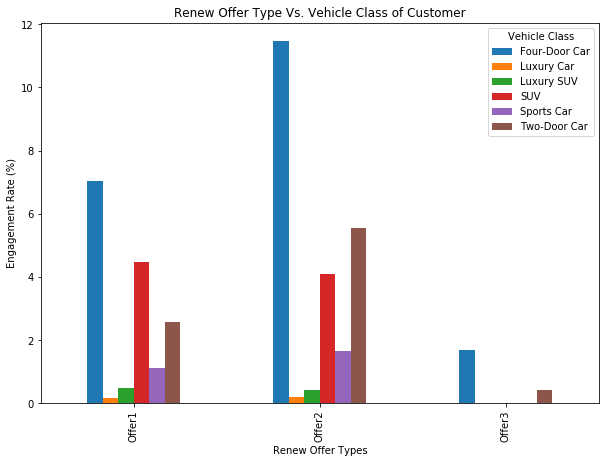

In [14]:
bar3 = offer_vehicle_type_pivot.plot(
    kind = 'bar',
    figsize = (10,7)
)

bar3.set_title('Renew Offer Type Vs. Vehicle Class of Customer')
bar3.set_xlabel('Renew Offer Types')
bar3.set_ylabel('Engagement Rate (%)')

plt.show()

#### From this data, we can interpret that people with 'Two-Door Car' have more inclination towards  Offer 2, as compared to other three offers.

#### Also, people with Four Door Car are most likely to take offers (preferably Offer 2)

## Engagement Rates by Sales Channel
### We are going to analyze how sales rates differs by different Sales Channel

In [15]:
sales_channel = df.loc[
    df['Response'] == 'Yes'
].groupby(['Sales Channel']).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

round(sales_channel*100, 2)

Sales Channel
Agent          19.15
Branch         11.45
Call Center    10.88
Web            11.77
Name: Customer, dtype: float64

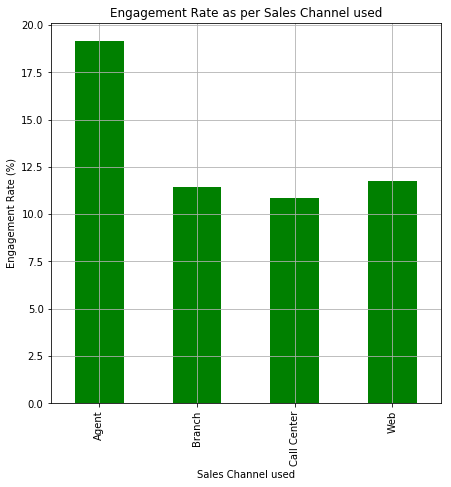

In [16]:
bar4 = (round(sales_channel*100, 2)).plot(
    kind = 'bar',
    color = 'green',
    grid = True,
    figsize =  (7,7)
)

bar4.set_title('Engagement Rate as per Sales Channel used')
bar4.set_xlabel('Sales Channel used')
bar4.set_ylabel('Engagement Rate (%)')

plt.show()


#### From the above chart we can see that Agent gets the most response from Marketing Calls and the overall response for Branch, Call Center and Web is almost equal and almost half of that of agents

In [17]:
sales_vehicle_type = df.loc[
    df['Response']=='Yes'
].groupby(['Sales Channel', 'Vehicle Size']).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

sales_vehicle_type.df = round(sales_vehicle_type*100,2)
sales_vehicle_type.df

Sales Channel  Vehicle Size
Agent          Large            2.07
               Medsize         14.50
               Small            2.59
Branch         Large            2.10
               Medsize          7.48
               Small            1.87
Call Center    Large            1.36
               Medsize          6.80
               Small            2.72
Web            Large            1.36
               Medsize          9.51
               Small            0.91
Name: Customer, dtype: float64

In [18]:
sales_vehicle_type_pivot = sales_vehicle_type.df.unstack().fillna(0)
sales_vehicle_type_pivot

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,2.07,14.50,2.59
Branch,2.10,7.48,1.87
Call Center,1.36,6.80,2.72
Web,1.36,9.51,0.91


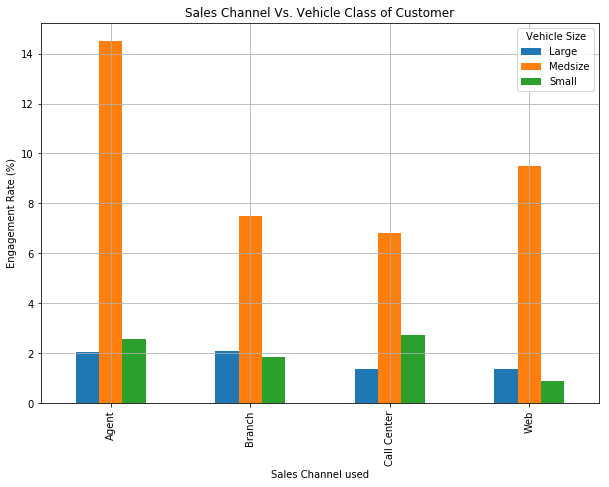

In [19]:
bar5 = sales_vehicle_type_pivot.plot(
    kind = 'bar',
    grid = True,
    figsize = (10,7)
)

bar5.set_title('Sales Channel Vs. Vehicle Class of Customer')
bar5.set_xlabel('Sales Channel used')
bar5.set_ylabel('Engagement Rate (%)')

plt.show()

#### The above chart shows that for all kinds of Sales Channel, people with 'Mid Size Vehicle' are most likely to response positively.

## Engagement Rate by months since policy inception

In [20]:
months_since_inc = df.loc[
    df['Response']=='Yes'
].groupby(['Months Since Policy Inception']).count()['Customer']/df.groupby(
    ['Months Since Policy Inception']).count()['Customer']

months_since_inc_df = round(months_since_inc*100,2)
months_since_inc_df.fillna(0)

Months Since Policy Inception
0     14.46
1     14.12
2     20.22
3     26.32
4     19.78
5      6.90
6      0.00
7      7.59
8      7.41
9     18.75
10    15.79
11    17.31
12     6.00
13    14.81
14     0.00
15    22.02
16     0.00
17    11.88
18    13.33
19    16.98
20    11.65
21    11.43
22    12.90
23    20.45
24    21.95
25    13.48
26    15.00
27    12.37
28    17.48
29    12.24
      ...  
70    23.53
71    12.00
72    23.76
73     6.82
74    19.78
75     6.12
76     6.98
77    18.95
78     7.32
79    11.88
80    16.44
81    15.79
82     0.00
83    24.00
84     6.00
85    14.12
86     0.00
87     7.89
88     7.89
89    18.56
90    14.29
91     8.00
92    16.22
93    26.67
94    25.00
95    15.58
96    17.91
97     0.00
98     0.00
99     7.69
Name: Customer, Length: 100, dtype: float64

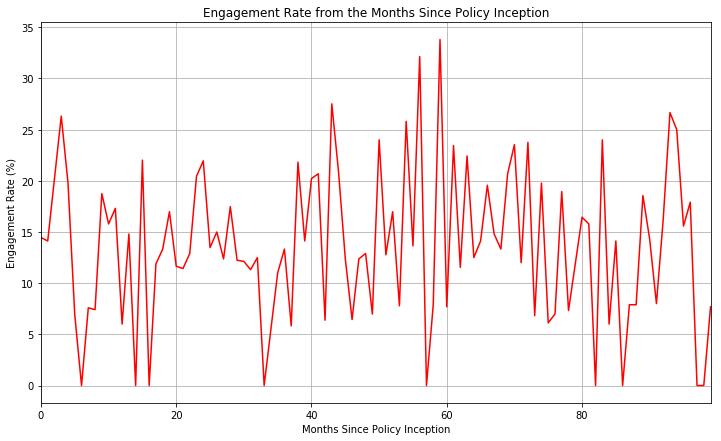

In [21]:
bar6 = months_since_inc_df.fillna(0).plot(
    figsize = (12,7),
    grid = True,
    color = 'red'
)

bar6.set_title('Engagement Rate from the Months Since Policy Inception')
bar6.set_xlabel('Months Since Policy Inception')
bar6.set_ylabel('Engagement Rate (%)')

plt.show()

## Customer Segregation by CLV and Months Since Policy Inception

In [22]:
#Distribution of the CLV (Customer LifeTime Value)
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

#### For the previous output, we are going to define two terms:
#### Customer(CLV) > Median - High CLV Customers
#### Customer(CLV) < Median - Low CLV Customers


In [23]:
#defining a function 'c_eval' to evaluate the High/Low valuation of Customer


def c_eval(clv):
    if(clv > df['Customer Lifetime Value'].median()):
        return "HIGH"
    else:
        return "LOW"

In [24]:
#using lambda to define inline function:
#Creating New Column: 'CLV Segment'
df['CLV Segment'] = df['Customer Lifetime Value'].apply(
    lambda clv: 'High' if clv > df['Customer Lifetime Value'].median() else 'Low'
)

In [25]:
#Applying the same concept for 'Months since policy inception'

df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [26]:
#Creating New Column: 'Policy Age Segment'
df['Policy_Age_segment'] = df['Months Since Policy Inception'].apply(
    lambda pas: 'High' if pas > df['Months Since Policy Inception'].median() else 'Low'
)

In [27]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV Segment,Policy_Age_segment
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Low,Low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,High,Low
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,High,Low
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,High,High
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Low,Low


In [28]:
df['CLV Segment'].head()

0     Low
1    High
2    High
3    High
4     Low
Name: CLV Segment, dtype: object

In [29]:
df['Policy_Age_segment'].head()

0     Low
1     Low
2     Low
3    High
4     Low
Name: Policy_Age_segment, dtype: object

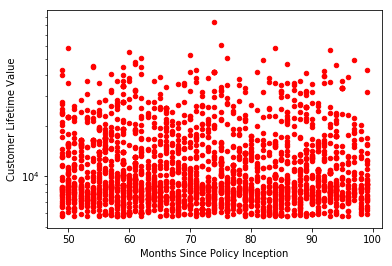

In [30]:
bar7_1 = df.loc[(df['CLV Segment']=='High') & (df['Policy_Age_segment']=='High')
             ].plot.scatter(
    x = 'Months Since Policy Inception',
    y = 'Customer Lifetime Value',
    logy = True,
    color = 'red'

)

plt.show()

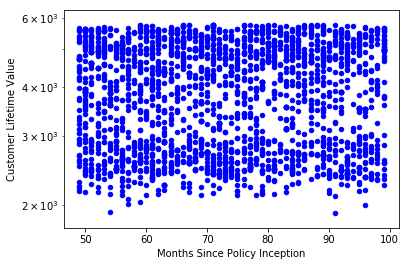

In [31]:
bar7_2 = df.loc[(df['CLV Segment']=='Low') & (df['Policy_Age_segment']=='High')
             ].plot.scatter(
    x = 'Months Since Policy Inception',
    y = 'Customer Lifetime Value',
    logy = True,
    color = 'blue'

)

plt.show()

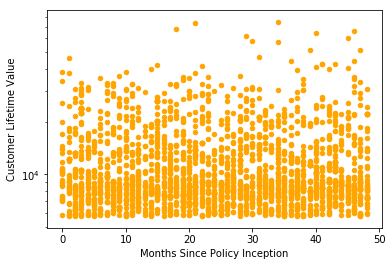

In [32]:
bar7_3 = df.loc[(df['CLV Segment']=='High') & (df['Policy_Age_segment']=='Low')
             ].plot.scatter(
    x = 'Months Since Policy Inception',
    y = 'Customer Lifetime Value',
    logy = True,
    color = 'orange'

)

plt.show()

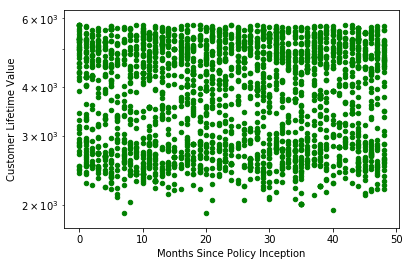

In [33]:
bar7_4 = df.loc[(df['CLV Segment']=='Low') & (df['Policy_Age_segment']=='Low')
             ].plot.scatter(
    x = 'Months Since Policy Inception',
    y = 'Customer Lifetime Value',
    logy = True,
    color = 'green'

)

plt.show()

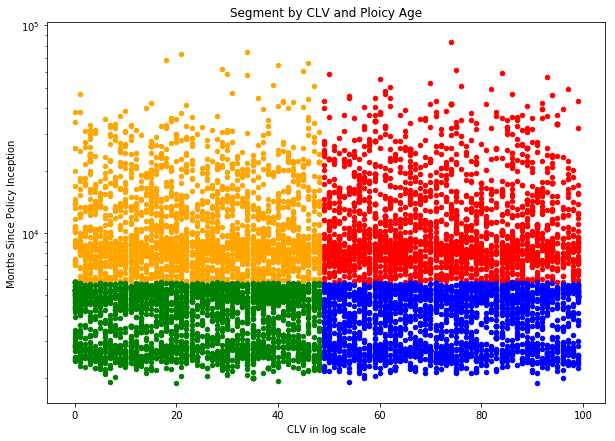

In [38]:
bar7 = df.loc[(df['CLV Segment']=='High') & (df['Policy_Age_segment']=='High')
             ].plot.scatter(
    x = 'Months Since Policy Inception',
    y = 'Customer Lifetime Value',
    logy = True,
    color = 'red'
)

df.loc[(df['CLV Segment']=='Low') & (df['Policy_Age_segment']=='High')
             ].plot.scatter(
    ax = bar7,
    x = 'Months Since Policy Inception',
    y = 'Customer Lifetime Value',
    logy = True,
    color = 'blue'
)

df.loc[(df['CLV Segment']=='High') & (df['Policy_Age_segment']=='Low')
             ].plot.scatter(
    ax = bar7,
    x = 'Months Since Policy Inception',
    y = 'Customer Lifetime Value',
    logy = True,
    color = 'orange'
)

df.loc[(df['CLV Segment']=='Low') & (df['Policy_Age_segment']=='Low')
             ].plot.scatter(
    ax = bar7,
    x = 'Months Since Policy Inception',
    y = 'Customer Lifetime Value',
    logy = True,
    color = 'green',
    figsize = (10, 7)
)

bar7.set_xlabel('CLV in log scale')
bar7.set_ylabel('Months Since Policy Inception')
bar7.set_title('Segment by CLV and Ploicy Age')

plt.show()